<a href="https://colab.research.google.com/github/jrDhiraj/machineLearning/blob/main/LoanAmount_89__Accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import Dependencing


In [285]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
import warnings
warnings.filterwarnings('ignore')


In [286]:
df = pd.read_csv('/content/Loan.csv')

Data preprocessing

In [287]:
df.shape

(614, 13)

In [288]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [289]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [290]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [291]:
df = df.drop('Loan_ID', axis=1)

<Axes: xlabel='Gender', ylabel='count'>

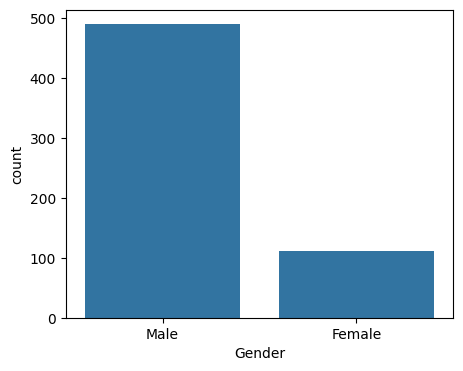

In [292]:
plt.figure(figsize=(5,4))

sns.countplot(x='Gender', data=df)

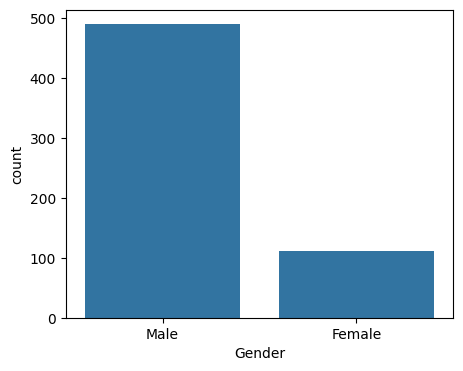

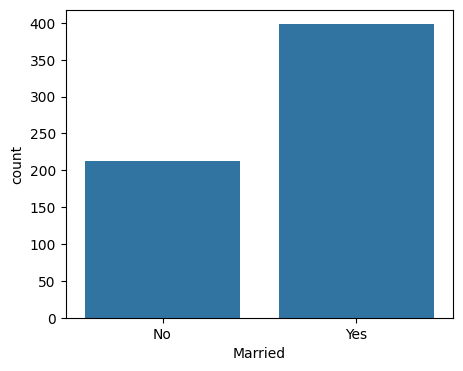

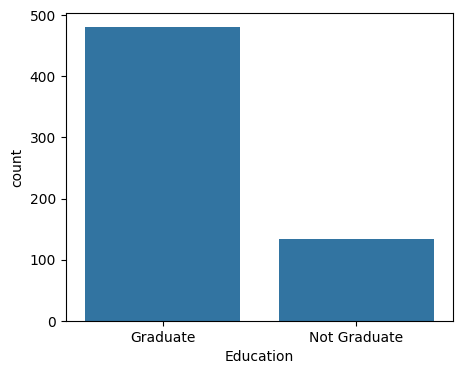

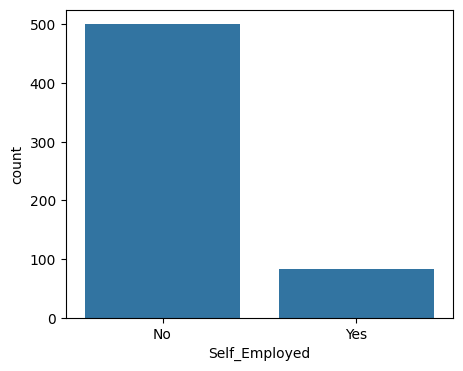

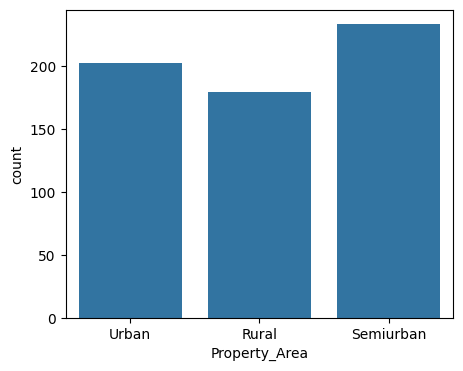

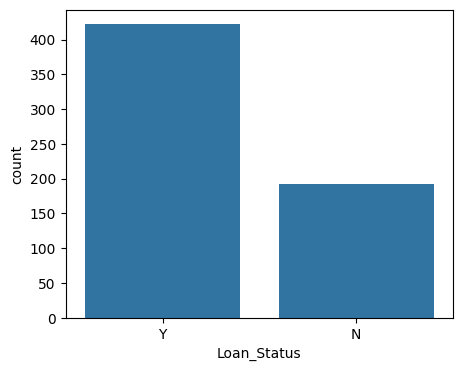

In [293]:
categorical = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

numerical = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


for i in categorical:
  plt.figure(figsize=(5,4))
  sns.countplot(x=i, data=df)

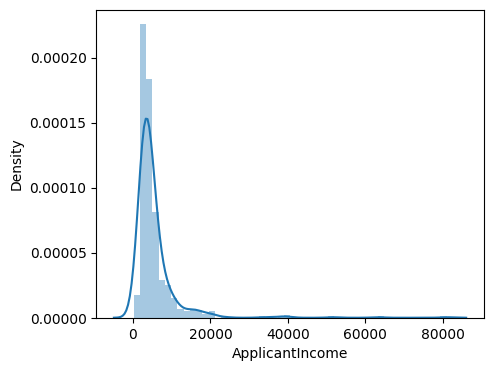

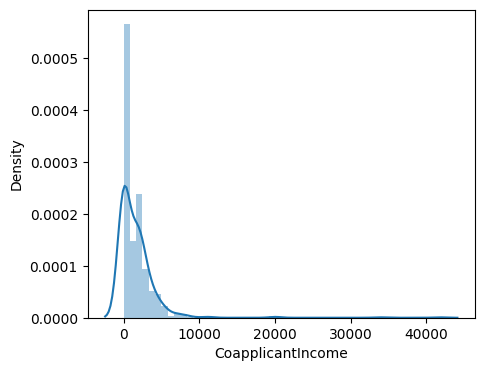

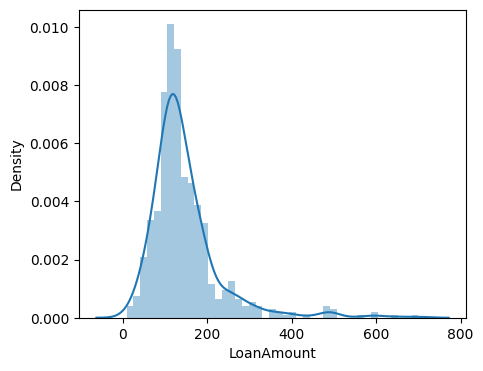

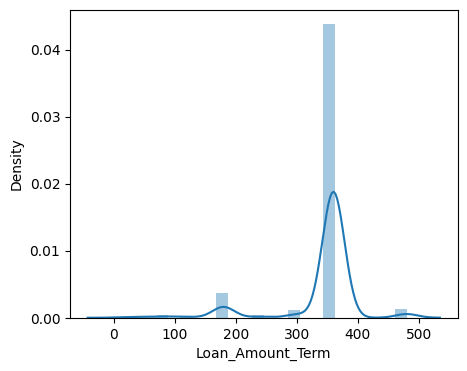

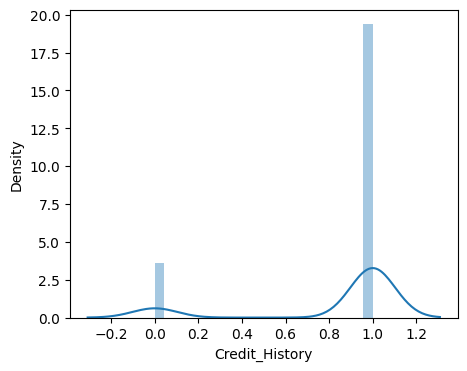

In [294]:
for i in numerical:
  plt.figure(figsize=(5,4))
  sns.distplot(df[i])

In [295]:
Q1 = df[numerical].quantile(0.25)
Q3 = df[numerical].quantile(0.75)
IQR = Q3 - Q1

for i in numerical:
  df = df[~((df[i] < (Q1[i] - 1.5 * IQR[i])) | (df[i] > (Q3[i] + 1.5 * IQR[i])))]

In [296]:
df.isnull().sum()

,0
Gender,5
Married,1
Dependents,6
Education,0
Self_Employed,26
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,13
Loan_Amount_Term,8
Credit_History,39


In [297]:
categorical = ['Gender', 'Married', 'Education', 'Self_Employed', 'Loan_Status']

for i in categorical:
  df[i].fillna(df[i].mode()[0], inplace=True)

In [298]:
for i in numerical:
  df[i].fillna(df[i].mean(), inplace=True)

# Fill missing values in 'Dependents' column
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)

In [299]:
df.isnull().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


In [300]:
df = pd.get_dummies(df, columns=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status'], drop_first=True)

In [301]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,129.205195,360.0,1.0,True,False,False,False,False,False,False,False,True,True
1,4583,1508.0,128.000000,360.0,1.0,True,True,True,False,False,False,False,False,False,False
2,3000,0.0,66.000000,360.0,1.0,True,True,False,False,False,False,True,False,True,True
3,2583,2358.0,120.000000,360.0,1.0,True,True,False,False,False,True,False,False,True,True
4,6000,0.0,141.000000,360.0,1.0,True,False,False,False,False,False,False,False,True,True


In [302]:
df = df.astype(int)

In [303]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0,129,360,1,1,0,0,0,0,0,0,0,1,1
1,4583,1508,128,360,1,1,1,1,0,0,0,0,0,0,0
2,3000,0,66,360,1,1,1,0,0,0,0,1,0,1,1
3,2583,2358,120,360,1,1,1,0,0,0,1,0,0,1,1
4,6000,0,141,360,1,1,0,0,0,0,0,0,0,1,1


In [304]:
X = df.drop('Loan_Status_Y', axis=1)
y = df['Loan_Status_Y']

In [305]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scale = scaler.fit_transform(X)  # scale only the features
y_scale = y.copy()                  # keep the target as it is (0/1)

# Split the scaled data
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
    X_scale, y_scale, test_size=0.2, random_state=42
)

In [306]:
scaled_df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,0.956057,-0.957293,-0.004322,0.0,0.0,0.485824,-1.350072,-0.429562,-0.441809,-0.25889,-0.525015,-0.365928,-0.802887,1.531188,0.481869
1,0.276597,0.102553,-0.026099,0.0,0.0,0.485824,0.740701,2.327951,-0.441809,-0.25889,-0.525015,-0.365928,-0.802887,-0.653088,-2.075251
2,-0.572997,-0.957293,-1.376226,0.0,0.0,0.485824,0.740701,-0.429562,-0.441809,-0.25889,-0.525015,2.732780,-0.802887,1.531188,0.481869
3,-0.796800,0.699946,-0.200309,0.0,0.0,0.485824,0.740701,-0.429562,-0.441809,-0.25889,1.904707,-0.365928,-0.802887,1.531188,0.481869
4,1.037098,-0.957293,0.256993,0.0,0.0,0.485824,-1.350072,-0.429562,-0.441809,-0.25889,-0.525015,-0.365928,-0.802887,1.531188,0.481869


SVM

In [307]:
from sklearn.svm import SVC

In [308]:
model = SVC()
model.fit(X_train_scaled, y_train_scaled)

SVC()

In [309]:
y_pred_scaled = model.predict(X_test_scaled)

In [310]:
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)

In [311]:
accuracy_scaled

0.725

model without scale

In [312]:
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [313]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the model
model = HistGradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8933


In [314]:
model2 = SVC(C=1.0, kernel='rbf', degree=5, gamma='auto', shrinking=True)
model2.fit(X_train, y_train)

SVC(degree=5, gamma='auto')

In [315]:
y_pred = model2.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

In [316]:
accuracy

0.8366666666666667